In [1]:
from numpy.random import randint
import numpy as np
from qiskit import *
from qiskit import IBMQ
from qiskit.visualization import plot_histogram,plot_bloch_multivector
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor

In [2]:
q=QuantumRegister(5)
c=ClassicalRegister(5)
qc=QuantumCircuit(q,c)

In [3]:
#prepare phiA and phiB
lis=[0,3]
for i in lis:
    qc.x(q[i])

In [4]:
qc.h(q[2])
qc.cx(q[2],q[1])
qc.cx(q[0],q[1])
qc.h(q[0])
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.draw()

┌───┐          ┌───┐┌─┐
q0_0: ┤ X ├───────■──┤ H ├┤M├
      └───┘┌───┐┌─┴─┐└┬─┬┘└╥┘
q0_1: ─────┤ X ├┤ X ├─┤M├──╫─
      ┌───┐└─┬─┘└───┘ └╥┘  ║ 
q0_2: ┤ H ├──■─────────╫───╫─
      ├───┤            ║   ║ 
q0_3: ┤ X ├────────────╫───╫─
      └───┘            ║   ║ 
q0_4: ─────────────────╫───╫─
                       ║   ║ 
c0: 5/═════════════════╩═══╩═
                       1   0

In [5]:
qc.x(q[2]).c_if(c[1],1)
qc.z(q[2]).c_if(c[0],1)
#qc.measure(q[2],c[2])

In [6]:
#swap test
qc.h(q[4])
qc.cswap(q[4],q[3],q[2])
qc.h(q[4])
qc.x(q[4])
qc.measure(q[4],c[4])

C:\Users\user\Anaconda3\envs\IBMQ\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


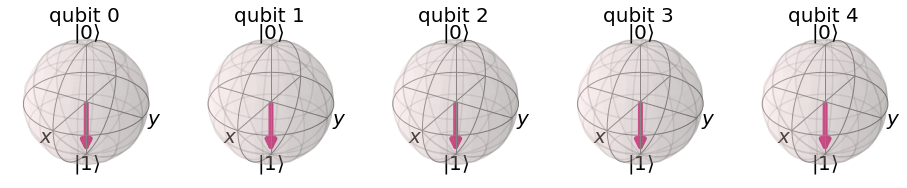

In [7]:
sim=Aer.get_backend("statevector_simulator")
job=execute(qc,sim,shots=1024)
res=job.result()
plot_bloch_multivector(res.get_statevector())

In [8]:
q2=QuantumRegister(6)
c2=ClassicalRegister(6)
qc2=QuantumCircuit(q2,c2)

In [9]:
#prepare
lis=[0,4]
for i in lis:
    qc2.h(q2[i])

In [10]:
qc2.h(q2[0])
qc2.h(q2[2])
qc2.cx(q2[0],q2[1])
qc2.cx(q2[2],q2[3])
qc2.cx(q2[1],q2[2])
qc2.h(q2[1])
qc2.measure(q2[1],c2[1])
qc2.measure(q2[2],c2[2])
qc2.draw()


┌───┐┌───┐                  
q30_0: ┤ X ├┤ H ├──■───────────────
       └───┘└───┘┌─┴─┐     ┌───┐┌─┐
q30_1: ──────────┤ X ├──■──┤ H ├┤M├
       ┌───┐     └───┘┌─┴─┐└┬─┬┘└╥┘
q30_2: ┤ H ├──■───────┤ X ├─┤M├──╫─
       └───┘┌─┴─┐     └───┘ └╥┘  ║ 
q30_3: ─────┤ X ├────────────╫───╫─
       ┌───┐└───┘            ║   ║ 
q30_4: ┤ X ├─────────────────╫───╫─
       └───┘                 ║   ║ 
q30_5: ──────────────────────╫───╫─
                             ║   ║ 
 c1: 6/══════════════════════╩═══╩═
                             2   1

In [11]:
qc2.x(q2[3]).c_if(c2[2],1)
qc2.z(q2[3]).c_if(c2[1],1)

In [12]:
#swap test
qc2.h(q2[5])
qc2.cswap(q2[5],q2[4],q2[3])
qc2.h(q2[5])
qc2.x(q2[5])
qc2.measure(q2[5],c2[5])
#qc2.draw()

C:\Users\user\Anaconda3\envs\IBMQ\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


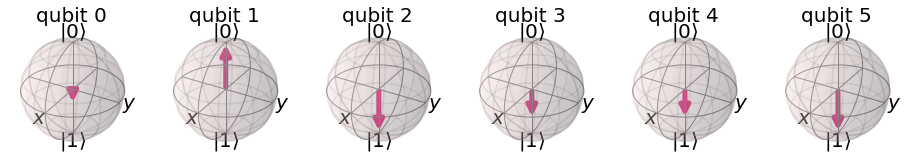

In [13]:
sim2=Aer.get_backend("statevector_simulator")
job2=execute(qc2,sim2,shots=1024)
res2=job2.result()
plot_bloch_multivector(res2.get_statevector())